# Wrangler and Analyse data

### by Istam Kulliev

# Introduction

 The purpose of the study was to determine the rating based on the likes collected from dogs on Twitter.
 
 Based on this database, the dog ratings were analyzed. It tracked the different breeds of dogs available on Twitter and their ratings.

My tasks in this project are as follows:
-	Data wrangling, which consists of:
	Gathering data (downloadable file in the Resources tab in the left most panel of your classroom and linked in step 1 below).
-	Assessing data
-	Cleaning data
-	Storing, analyzing, and visualizing your wrangled data
-	Reporting on 

1) data wrangling efforts

2) data analyses and visualizations


### Gathering data

The WeRateDogs Twitter archive is provided in twitter_archive_enhanced.csv. We collect the necessary data from this database.

Use the Requests library Udacity's servers and should be downloaded programmatically the following URL:

https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

Using query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data.



In [12]:
#Import all packages need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import re
import json
import time
import datetime as dt
import seaborn as sb
from IPython.display import Image
import tweepy

In [13]:
# read csv file and information about data 
df = pd.read_csv('twitter-archive-enhanced.csv')

In [14]:
df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [15]:
# Inforamtion about data twitter-archive-enhanced.csv.
print("Rows: {}\nColumns: {}".
      format(*df.shape))

Rows: 2356
Columns: 17


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

This data consists of a total of 2356 rows and 17 columns. 

In [17]:
# Information about columns the dataset
df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [18]:
# Print the number of unique values for each variable.
df.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

###  Analisys image-predictions

#### Download programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [19]:
# Put contents of the downloaded file into a data frame, using the read_csv-function. 
# A tsv-file differs only by the separator from a csv-file.
# Information about tweet image prediction

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
df_image_predictions = pd.read_csv(url, sep = '\t')

In [20]:
# Information data image_prediction 
df_image_predictions.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [21]:
# Inforamtion about data twitter-archive-enhanced.csv.
print("Rows: {}\nColumns: {}".
      format(*df_image_predictions.shape))

Rows: 2075
Columns: 12


### Twitter's API

In [22]:
#using Python's Tweepy library and download data  data from tweet_json to github
# Read in all the data from tweet_json.txt
#data_json = 'tweet_json.txt'
# print(df_json)
#path = 
#file = 'tweet_json'
#df_json = pd.read_json(path+file) 
#df_json = pd.read_json('tweet_json.json', orient = 'index', )
data_json = pd.read_json ('https://raw.githubusercontent.com/istam/Wrangle-and-Analyze-Data/main/tweet-json.json', lines = True)
#pd.read_json(data_json, lines = True)

In [23]:
data_json.head(3)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [24]:
data_json.full_text

0       This is Phineas. He's a mystical boy. Only eve...
1       This is Tilly. She's just checking pup on you....
2       This is Archie. He is a rare Norwegian Pouncin...
3       This is Darla. She commenced a snooze mid meal...
4       This is Franklin. He would like you to stop ca...
                              ...                        
2349    Here we have a 1949 1st generation vulpix. Enj...
2350    This is a purebred Piers Morgan. Loves to Netf...
2351    Here is a very happy pup. Big fan of well-main...
2352    This is a western brown Mitsubishi terrier. Up...
2353    Here we have a Japanese Irish Setter. Lost eye...
Name: full_text, Length: 2354, dtype: object

In [25]:
# Save tweet_json.json file to csv data_json.csv file 
data_json.to_csv('tweet_json.csv')

In [26]:
data_json_csv = pd.read_csv('tweet_json.csv')

In [27]:
data_json_csv.head(2)

,Unnamed: 0,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [28]:
data_json_csv.dtypes

Unnamed: 0                         int64
created_at                        object
id                                 int64
id_str                             int64
full_text                         object
truncated                           bool
display_text_range                object
entities                          object
extended_entities                 object
source                            object
in_reply_to_status_id            float64
in_reply_to_status_id_str        float64
in_reply_to_user_id              float64
in_reply_to_user_id_str          float64
in_reply_to_screen_name           object
user                              object
geo                              float64
coordinates                      float64
place                             object
contributors                     float64
is_quote_status                     bool
retweet_count                      int64
favorite_count                     int64
favorited                           bool
retweeted       

# Assesment and  Data Cleaning

##### 
After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues. Detect and document at least 8 quality issues and 2 tidiness issues in your wrangle_act.ipynb Jupyter Notebook. To meet specifications, the issues that satisfy the Project Motivation must be assessed.

### Quality

According to the database twitter_archive:

1. Identify rows of unnamed dogs
2. Some of the rating_denominators are entered incorrectly.
3. There are rows of redundant retweets in the database
4. Incorrect types of data given "time stamp", "tweet_id".
5. There is data in image_prediction.
6. The in_reply_to_status_id and in_reply_to_user_id data are not sufficient for evaluation.
7. The TWEET API does not use columns such as geo, coordinates, place, contributors in the data set.
8. Quality sources tweeted to dogs



### Quantity:
1. To assess the experience of dogs need only one "stage" column
2. The dog’s “stages” are not a single column filled with values.

## Clean data 

###  I create backup copies of the database to use for Data Cleaning and keep the originals for future data analysis.


In [29]:
# Create copie
clean_df_archive = df.copy()
clean_df_image = df_image_predictions.copy()
clean_df_tweet = data_json_csv.copy()

In [30]:
clean_df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

A collection of a total of 2356 rows and 16 columns can be seen from this data

In [31]:
clean_df_archive['doggo'].fillna(value = "None", inplace = True )

In [32]:
# Replace empty entries
clean_df_archive.doggo.replace('None', '', inplace=True)
clean_df_archive.floofer.replace('None', '', inplace=True)
clean_df_archive.pupper.replace('None', '', inplace=True)
clean_df_archive.puppo.replace('None', '', inplace=True)

In [33]:
clean_df_archive['dog_stage'] = clean_df_archive['doggo'] + clean_df_archive['puppo'] + clean_df_archive['floofer']+ clean_df_archive['pupper']

In [34]:
print(clean_df_archive['dog_stage'].value_counts())

                1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64


In [35]:
clean_df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [36]:
# Create breed column
clean_df_image['breed_dog'] = np.where(clean_df_image['p1_dog'], clean_df_image['p1'],
                              np.where(clean_df_image['p2_dog'], clean_df_image['p2'],
                              np.where(clean_df_image['p3_dog'], clean_df_image['p3'],
                              np.NaN
                              )))

In [37]:
clean_df_image.breed_dog.value_counts()

golden_retriever      173
Labrador_retriever    113
Pembroke               96
Chihuahua              95
pug                    65
                     ... 
Japanese_spaniel        1
standard_schnauzer      1
silky_terrier           1
EntleBucher             1
Irish_wolfhound         1
Name: breed_dog, Length: 113, dtype: int64

In [38]:
clean_df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     2354 non-null   int64  
 1   created_at                     2354 non-null   object 
 2   id                             2354 non-null   int64  
 3   id_str                         2354 non-null   int64  
 4   full_text                      2354 non-null   object 
 5   truncated                      2354 non-null   bool   
 6   display_text_range             2354 non-null   object 
 7   entities                       2354 non-null   object 
 8   extended_entities              2073 non-null   object 
 9   source                         2354 non-null   object 
 10  in_reply_to_status_id          78 non-null     float64
 11  in_reply_to_status_id_str      78 non-null     float64
 12  in_reply_to_user_id            78 non-null     f

In [39]:
# rename 'id' columns to 'tweet_id' for merging
clean_df_tweet = clean_df_tweet.rename({'id':'tweet_id'}, axis = 'columns')

In [40]:
clean_df_tweet.head(1)

,Unnamed: 0,created_at,tweet_id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


# By combining the data obtained, we make the data ready for visualization.

In [41]:
# merging 2 dataframes for vizsualisation
df_visual1 = pd.merge(clean_df_archive, clean_df_image, on =['tweet_id'], how= 'inner')
df_visual1.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2075 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2075 non-null   object 
 4   source                      2075 non-null   object 
 5   text                        2075 non-null   object 
 6   retweeted_status_id         81 non-null     float64
 7   retweeted_status_user_id    81 non-null     float64
 8   retweeted_status_timestamp  81 non-null     object 
 9   expanded_urls               2075 non-null   object 
 10  rating_numerator            2075 non-null   int64  
 11  rating_denominator          2075 non-null   int64  
 12  name                        2075 non-null   object 
 13  doggo                       2075 

In [44]:
### Combined data obtained. We keep this base as a twitter master.

In [89]:
df_visual_all = pd.merge(df_visual1, clean_df_tweet, on =['tweet_id'], how= 'inner')

In [90]:
twittermaster.to_csv('C://Users//istam//Desktop//Wrangle-and-Analyze-Data-master//Istam//df_visual_all.csv')

In [91]:
twittermaster.head(2)

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [78]:
twittermaster.name.value_counts()

None       577
a           55
Charlie     11
Cooper      10
Lucy        10
          ... 
Suki         1
Kloey        1
Creg         1
Tove         1
Orion        1
Name: name, Length: 936, dtype: int64

# We delete unnecessary columns

In [74]:
# We select unnecessary columns
twittermaster.isna().sum()

tweet_id                      0
in_reply_to_status_id_x    2050
in_reply_to_user_id_x      2050
timestamp                     0
source_x                      0
                           ... 
lang                          0
retweeted_status           1994
quoted_status_id           2073
quoted_status_id_str       2073
quoted_status              2073
Length: 61, dtype: int64

In [48]:
twittermaster.drop(['in_reply_to_user_id_x', 'in_reply_to_user_id_x', 'retweeted_status_id', 'retweeted_status_user_id', 
                  'retweeted_status_timestamp', 'in_reply_to_status_id_y', 'in_reply_to_status_id_str', 'in_reply_to_user_id_y',
                 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 
                   'quoted_status_id', 'quoted_status_id_str', 'quoted_status' ], axis =1, inplace = True)

In [49]:
twittermaster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tweet_id                       2073 non-null   int64  
 1   in_reply_to_status_id_x        23 non-null     float64
 2   timestamp                      2073 non-null   object 
 3   source_x                       2073 non-null   object 
 4   text                           2073 non-null   object 
 5   expanded_urls                  2073 non-null   object 
 6   rating_numerator               2073 non-null   int64  
 7   rating_denominator             2073 non-null   int64  
 8   name                           2073 non-null   object 
 9   doggo                          2073 non-null   object 
 10  floofer                        2073 non-null   object 
 11  pupper                         2073 non-null   object 
 12  puppo                          2073 non-null   o

In [50]:
twittermaster['timestamp'] = pd.to_datetime(twittermaster['timestamp'])
twittermaster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       2073 non-null   int64              
 1   in_reply_to_status_id_x        23 non-null     float64            
 2   timestamp                      2073 non-null   datetime64[ns, UTC]
 3   source_x                       2073 non-null   object             
 4   text                           2073 non-null   object             
 5   expanded_urls                  2073 non-null   object             
 6   rating_numerator               2073 non-null   int64              
 7   rating_denominator             2073 non-null   int64              
 8   name                           2073 non-null   object             
 9   doggo                          2073 non-null   object             
 10  floofer                 

In [51]:
print(twittermaster.groupby('source_x')['tweet_id'].nunique())

source_x
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       30
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2032
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: tweet_id, dtype: int64


In [52]:
twittermaster = twittermaster.rename({'rating_denominator':'rating'}, axis = 'columns')
twittermaster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       2073 non-null   int64              
 1   in_reply_to_status_id_x        23 non-null     float64            
 2   timestamp                      2073 non-null   datetime64[ns, UTC]
 3   source_x                       2073 non-null   object             
 4   text                           2073 non-null   object             
 5   expanded_urls                  2073 non-null   object             
 6   rating_numerator               2073 non-null   int64              
 7   rating                         2073 non-null   int64              
 8   name                           2073 non-null   object             
 9   doggo                          2073 non-null   object             
 10  floofer                 

In [53]:
twittermaster['time'] = pd.to_datetime(twittermaster.created_at)
twittermaster.time.dt.year

0       2017
1       2017
2       2017
3       2017
4       2017
        ... 
2068    2015
2069    2015
2070    2015
2071    2015
2072    2015
Name: time, Length: 2073, dtype: int64

### Analyse and visualization

We analyze indicators such as retweet_count, favorite_count, retweeted.
Based on them, we will look at the rating of dogs.

In [54]:
# convert timestamp to datetime
twittermaster['timestamp'] = pd.to_datetime(twittermaster['timestamp'])

#extract year, month and day to new columns
twittermaster['year'] = twittermaster['timestamp'].dt.year
twittermaster['month'] = twittermaster['timestamp'].dt.month
twittermaster['day'] = twittermaster['timestamp'].dt.day

In [55]:
twittermaster.head(5)

,tweet_id,in_reply_to_status_id_x,timestamp,source_x,text,expanded_urls,rating_numerator,rating,name,doggo,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,time,year,month,day
0,892420643555336193,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,...,39467,False,False,0.0,0.0,en,2017-08-01 16:23:56+00:00,2017,8,1
1,892177421306343426,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,...,33819,False,False,0.0,0.0,en,2017-08-01 00:17:27+00:00,2017,8,1
2,891815181378084864,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,...,25461,False,False,0.0,0.0,en,2017-07-31 00:18:03+00:00,2017,7,31
3,891689557279858688,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,...,42908,False,False,0.0,0.0,en,2017-07-30 15:58:51+00:00,2017,7,30
4,891327558926688256,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,...,41048,False,False,0.0,0.0,en,2017-07-29 16:00:24+00:00,2017,7,29


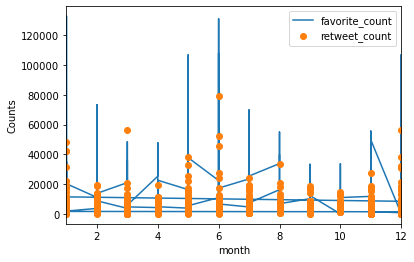

In [56]:
# Distribution by month of retweet by dog breed
plt.plot(twittermaster.month, twittermaster.favorite_count )
plt.plot(twittermaster.month, twittermaster.retweet_count, 'o' )
plt.legend(['favorite_count', 'retweet_count'])
plt.xlabel('month')
plt.ylabel('Counts')
plt.xlim(1, 12);
plt.show()

Retweets for dog breeds were higher in May, June, and December than the monthly distribution

Text(0.5, 1.0, 'Count of dogs over the years')

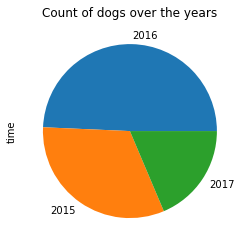

In [57]:
# Count of dogs over the years
twittermaster.time.dt.year
twittermaster.time.dt.year.value_counts().plot(kind='pie')
plt.title('Count of dogs over the years')

In [58]:
print(twittermaster[(twittermaster.dog_stage !='None')].count())

tweet_id                         2073
in_reply_to_status_id_x            23
timestamp                        2073
source_x                         2073
text                             2073
expanded_urls                    2073
rating_numerator                 2073
rating                           2073
name                             2073
doggo                            2073
floofer                          2073
pupper                           2073
puppo                            2073
dog_stage                        2073
jpg_url                          2073
img_num                          2073
p1                               2073
p1_conf                          2073
p1_dog                           2073
p2                               2073
p2_conf                          2073
p2_dog                           2073
p3                               2073
p3_conf                          2073
p3_dog                           2073
breed_dog                        1750
Unnamed: 0  

In [59]:
v0=twittermaster[(twittermaster.name !='None') & (twittermaster.name !='a')]

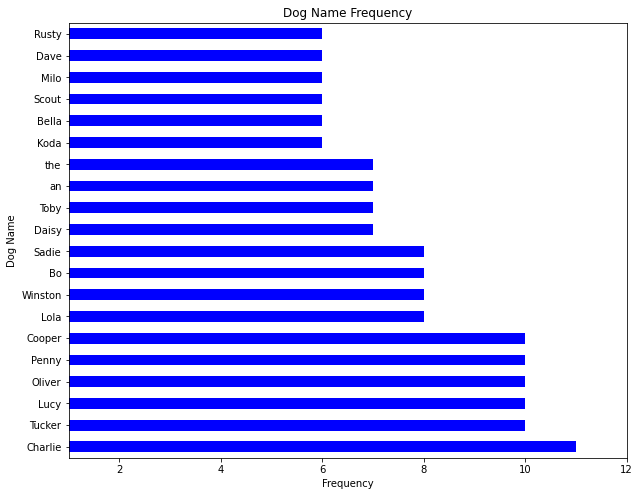

In [60]:
# Plot the top 10 Dog names by frequency
plt.figure(figsize=(10, 8))
v0.name.value_counts().nlargest(20).plot(kind = 'barh', color =  'b');
plt.title('Dog Name Frequency');
plt.xlabel('Frequency');
plt.ylabel('Dog Name');
plt.xlim(1, 12);

In [61]:
# view dog stage 
v1=twittermaster[(twittermaster.dog_stage !='') & (twittermaster.name !='None')]

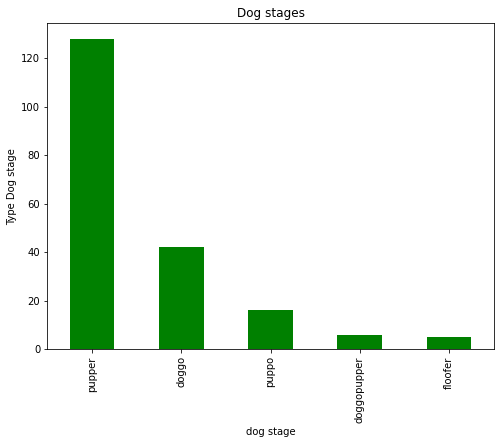

In [62]:
# Plot the top 10  dog stages
plt.figure(figsize=(8, 6))
v1.dog_stage.value_counts().nlargest(10).plot(kind = 'bar', color =  'g');
plt.title('Dog stages');
plt.xlabel('dog stage');
plt.ylabel('Type Dog stage');

In [63]:
twittermaster.breed_dog.value_counts()

golden_retriever        173
Labrador_retriever      113
Pembroke                 95
Chihuahua                95
pug                      65
                       ... 
Japanese_spaniel          1
silky_terrier             1
Bouvier_des_Flandres      1
EntleBucher               1
Irish_wolfhound           1
Name: breed_dog, Length: 113, dtype: int64

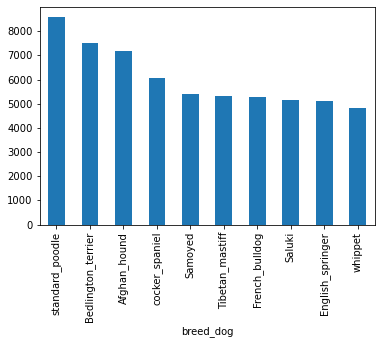

<Figure size 720x360 with 0 Axes>

In [64]:
# Ratings on dog breeds for retweet_count.
twittermaster.groupby('breed_dog')['retweet_count'].mean().sort_values(ascending=False).nlargest(10).plot.bar(x='breed_dog', y = 'retweet_count')
plt.figure(figsize=(10, 5))
#twittermaster.breed_dog.value_counts().nlargest(20).plot.bar(x='breed_dog', y = 'retweet_count')
plt.style.use('ggplot')

#plt.style.available

##### Highly retweeted dog breeds such as standard_poodle 8569, Bedlington_terrier (7510, Afghan_hound (7163)

<AxesSubplot:>

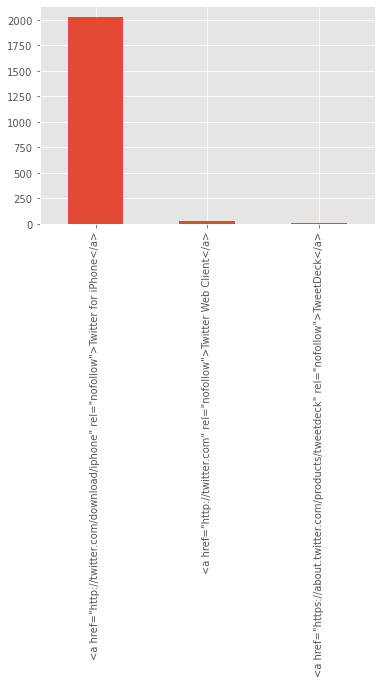

In [65]:
# Visualization source 
twittermaster.source_x.value_counts().plot(kind='bar')

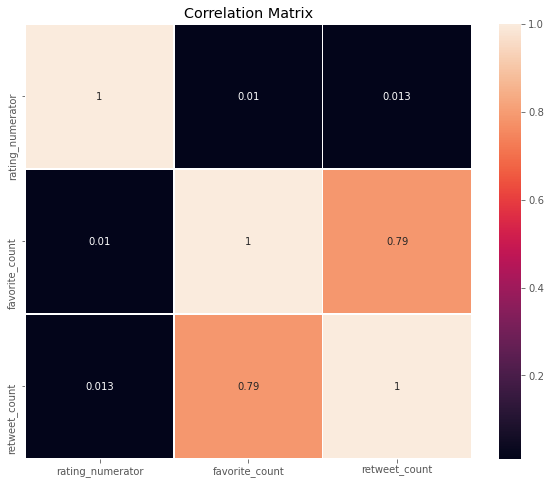

In [66]:
g,ax = plt.subplots(figsize=(10, 8))
sb.heatmap(twittermaster[['rating_numerator', 'favorite_count', 'retweet_count']].corr(), annot=True, linewidths=.4)
plt.title('Correlation Matrix');

The above dogs can be seen from the data as long as the number of tweets and favorites are related